In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set display options
pd.set_option('display.max_columns', None)


In [32]:
# Load the dataset
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

# Display the first few rows of the dataset
print(data.head())


  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [33]:
# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing values
data.dropna(inplace=True)

# Check for duplicates and remove them
data.drop_duplicates(inplace=True)


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [34]:
# Convert 'Order Date' to datetime format (automatically infers format)
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year


In [35]:
# Initialize the label encoder
le = LabelEncoder()

# Encode categorical variables
categorical_columns = ['Category', 'Sub Category', 'City', 'Region', 'State']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Display the first few rows after encoding
print(data.head())


  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0        8.0         11.0      2017.0  
1    749      0.18  149.80      0        8.0         11.0      2017.0  
2   2360      0.21  165.20      0       12.0          6.0      2017.0  
3    896      0.25   89.60      0       11.0         10.0      2016.0  
4   2355      0.26  918.45      0       11.0         10.0      2016.0  


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12308\71505182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


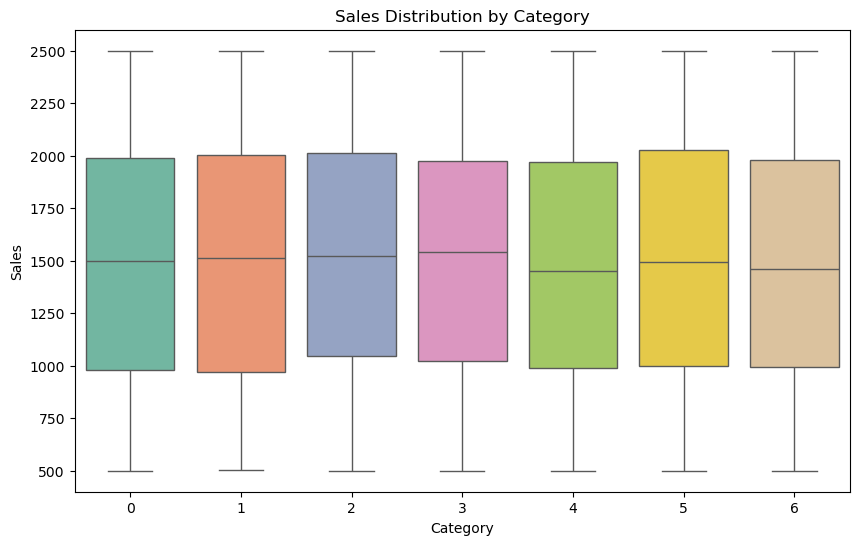

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


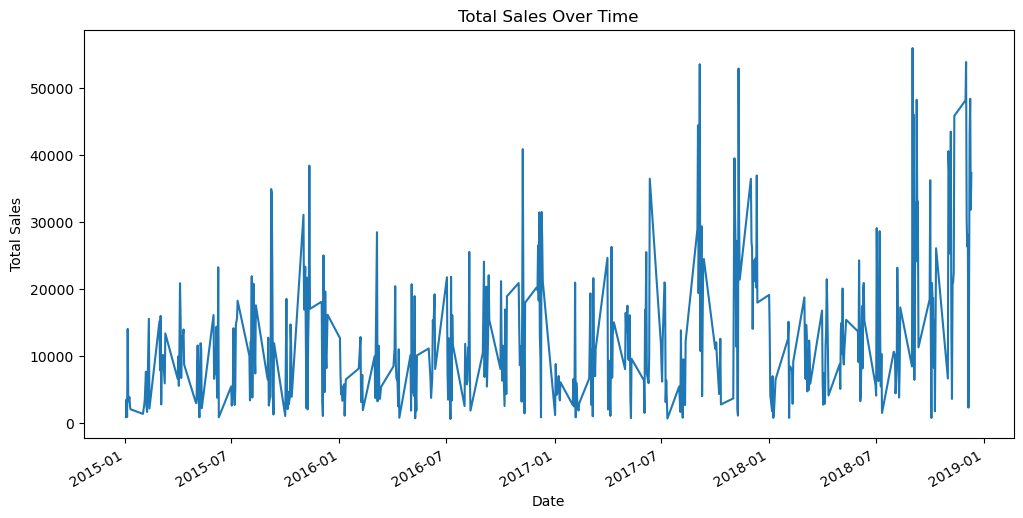

In [37]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


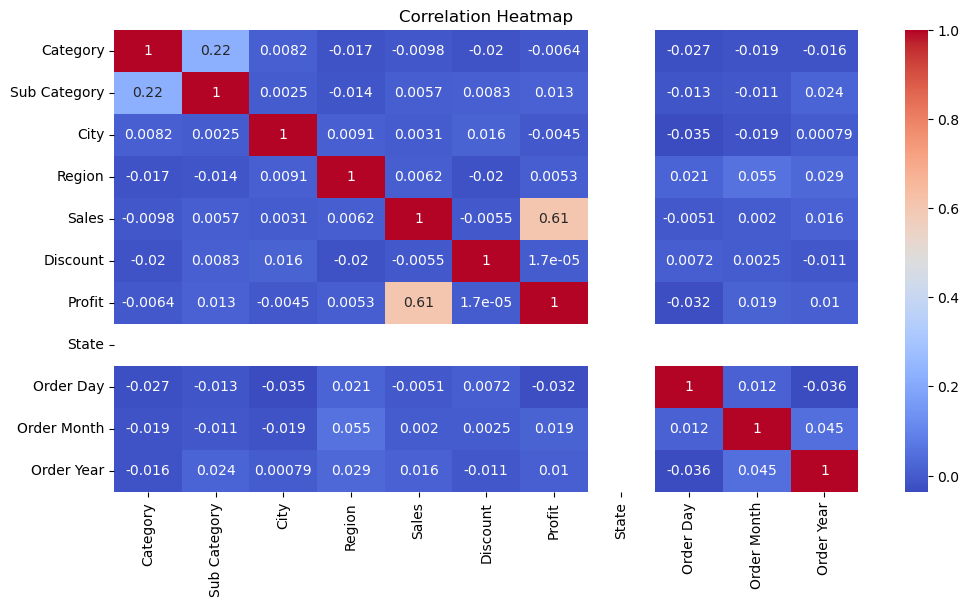

In [38]:
# Ensure that only numeric columns are included in the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(12, 6))
corr_matrix = numeric_data.corr()

# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [39]:
# Drop irrelevant columns
data = data.drop(columns=['Order ID', 'Customer Name', 'Order Date'])

# Select features and target variable
features = data.drop(columns=['Sales'])
target = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
# Impute missing values in X_train and X_test to handle NaN values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [41]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 212753.660079962
R-squared: 0.354933451475676


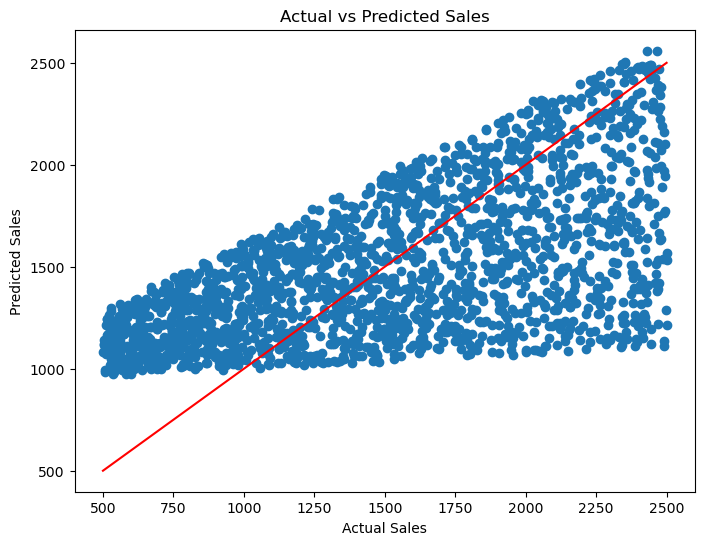

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()
